In [90]:
import pandas as pd
import matplotlib as plt

In [91]:
data1 = pd.read_csv('layoffs.csv')
data2 = pd.read_csv('layoffs_data.csv')

In [92]:
print(data1.columns, len(data1.columns))
print(f"Data1 --- Columns: {len(data1.columns)}, Rows: {len(data1)}")
print(data2.columns, len(data2.columns))
print(f"Data2 --- Columns: {len(data2.columns)}, Rows: {len(data2)}")

Index(['company', 'location', 'industry', 'total_laid_off',
       'percentage_laid_off', 'date', 'stage', 'country', 'funds_raised'],
      dtype='object') 9
Data1 --- Columns: 9, Rows: 3148
Index(['company', 'location', 'industry', 'percentage_laid_off', 'date',
       'source', 'funds_raised', 'stage', 'date_added', 'country',
       'total_laid_off', 'list_of_employees_laid_off'],
      dtype='object') 12
Data2 --- Columns: 12, Rows: 2738


In [93]:
data2.drop(columns=['source', 'date_added', 'list_of_employees_laid_off'], inplace=True)
print(data2.columns, len(data2.columns))
print(f"Data2 --- Columns: {len(data2.columns)}, Rows: {len(data2)}")

Index(['company', 'location', 'industry', 'percentage_laid_off', 'date',
       'funds_raised', 'stage', 'country', 'total_laid_off'],
      dtype='object') 9
Data2 --- Columns: 9, Rows: 2738


In [94]:
data = pd.concat([data1, data2])
print(f"Columns: {len(data.columns)}, Rows: {len(data)}")

Columns: 9, Rows: 5886


In [95]:
data = data.dropna(subset=['total_laid_off', 'percentage_laid_off'])
print(f"Columns: {len(data.columns)}, Rows: {len(data)}")

Columns: 9, Rows: 2873


In [96]:
data.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
1,Viasat,San Diego,Other,800.0,0.10,2023-11-02,Post-IPO,United States,366.0
4,Informatica,SF Bay Area,Data,545.0,0.10,2023-11-01,Post-IPO,United States,NaN
5,Splunk,SF Bay Area,Data,500.0,0.07,2023-11-01,Post-IPO,United States,2400.0
6,Faire,SF Bay Area,Retail,250.0,0.20,2023-11-01,Series G,United States,1700.0
7,Sana Benefits,Austin,HR,73.0,0.50,2023-11-01,Series B,United States,106.0


### Q1: Which year had the most layoffs?

In [97]:
data_filtered = data[['date', 'total_laid_off']]
data_filtered['year'] = data_filtered['date'].apply(lambda x: x.split('-')[0])
data_filtered = data_filtered[['year', 'total_laid_off']]

C:\Users\heart\AppData\Local\Temp\ipykernel_29060\3798564519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['year'] = data_filtered['date'].apply(lambda x: x.split('-')[0])


In [98]:
layoffs_by_year = data_filtered.groupby('year').sum()
layoffs_by_year

,total_laid_off
year,
2020,141242.0
2021,13006.0
2022,278760.0
2023,354580.0


In [99]:
max_index = layoffs_by_year['total_laid_off'].idxmax()
print(max_index)

2023


<Axes: xlabel='year'>

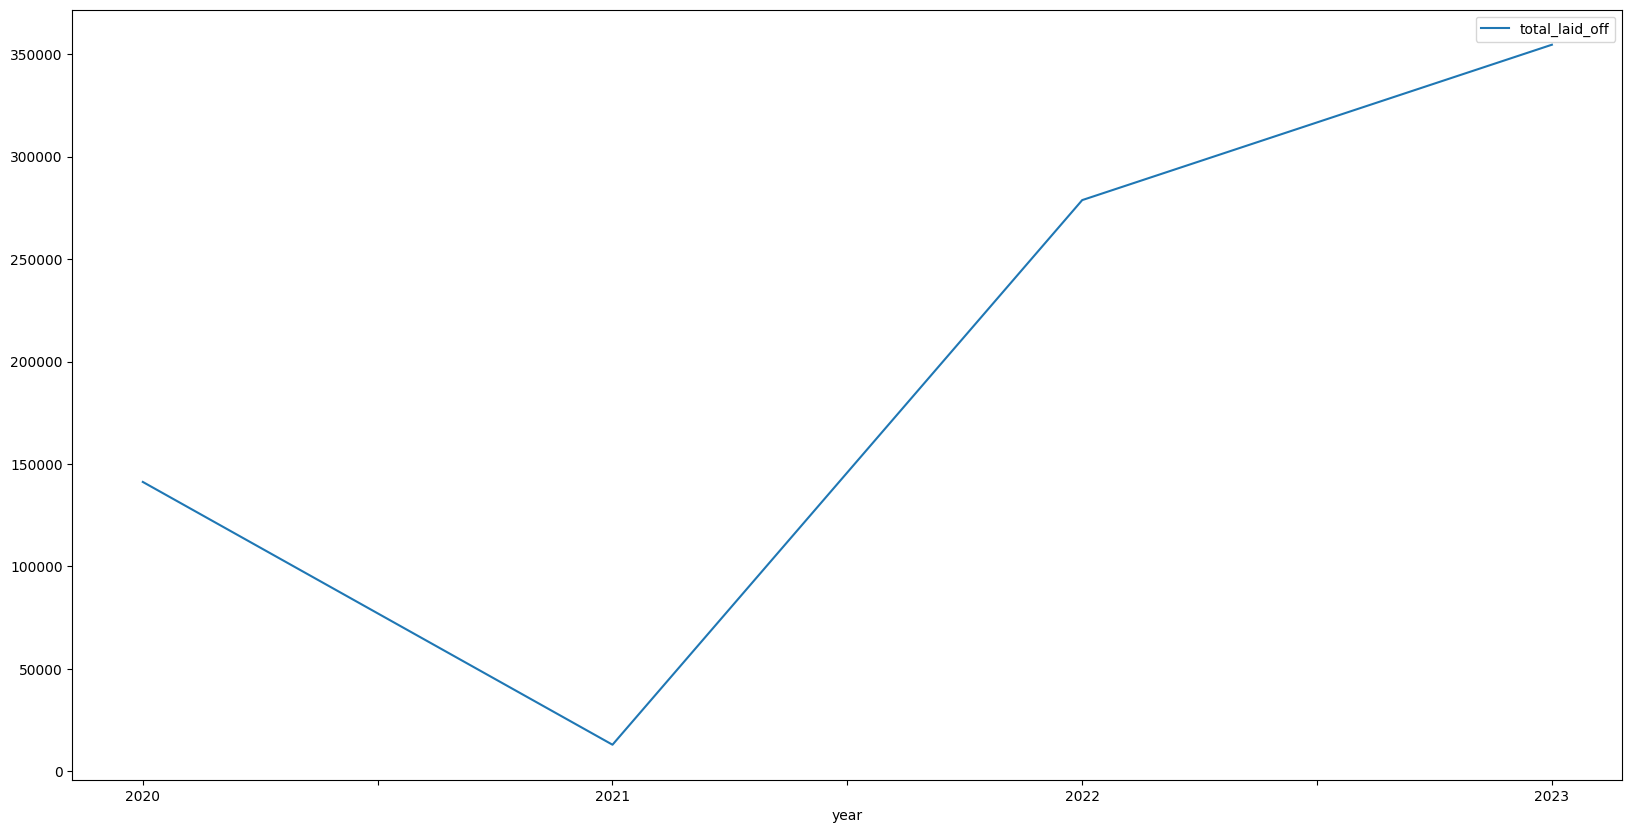

In [100]:
layoffs_by_year.plot(kind='line', figsize=(20, 10))

### Q2: Which country had the most layoffs?

In [101]:
layoffs_by_country = data[['country', 'total_laid_off']].groupby('country').sum()
layoffs_by_country

,total_laid_off
country,
Argentina,566.0
Australia,5572.0
Austria,680.0
Brazil,18392.0
Bulgaria,240.0
Canada,17307.0
Chile,590.0
China,1510.0
Denmark,670.0


In [102]:
max_index = layoffs_by_country['total_laid_off'].idxmax()
print(max_index)

United States


### Q3: Which location in the United Stated had the most layoffs?

In [103]:
data_filtered = data[['country', 'location', 'total_laid_off']]
layoffs_in_us = data_filtered[data_filtered['country'] == 'United States'][['location', 'total_laid_off']].groupby('location').sum()
layoffs_in_us

,total_laid_off
location,
Albany,742.0
Ann Arbor,480.0
Atlanta,3690.0
Austin,21051.0
Baltimore,346.0
Bend,100.0
Boise,14400.0
Boston,21032.0
Boulder,516.0


In [104]:
max_index = layoffs_in_us['total_laid_off'].idxmax()
print(max_index)

SF Bay Area


<Axes: xlabel='location'>

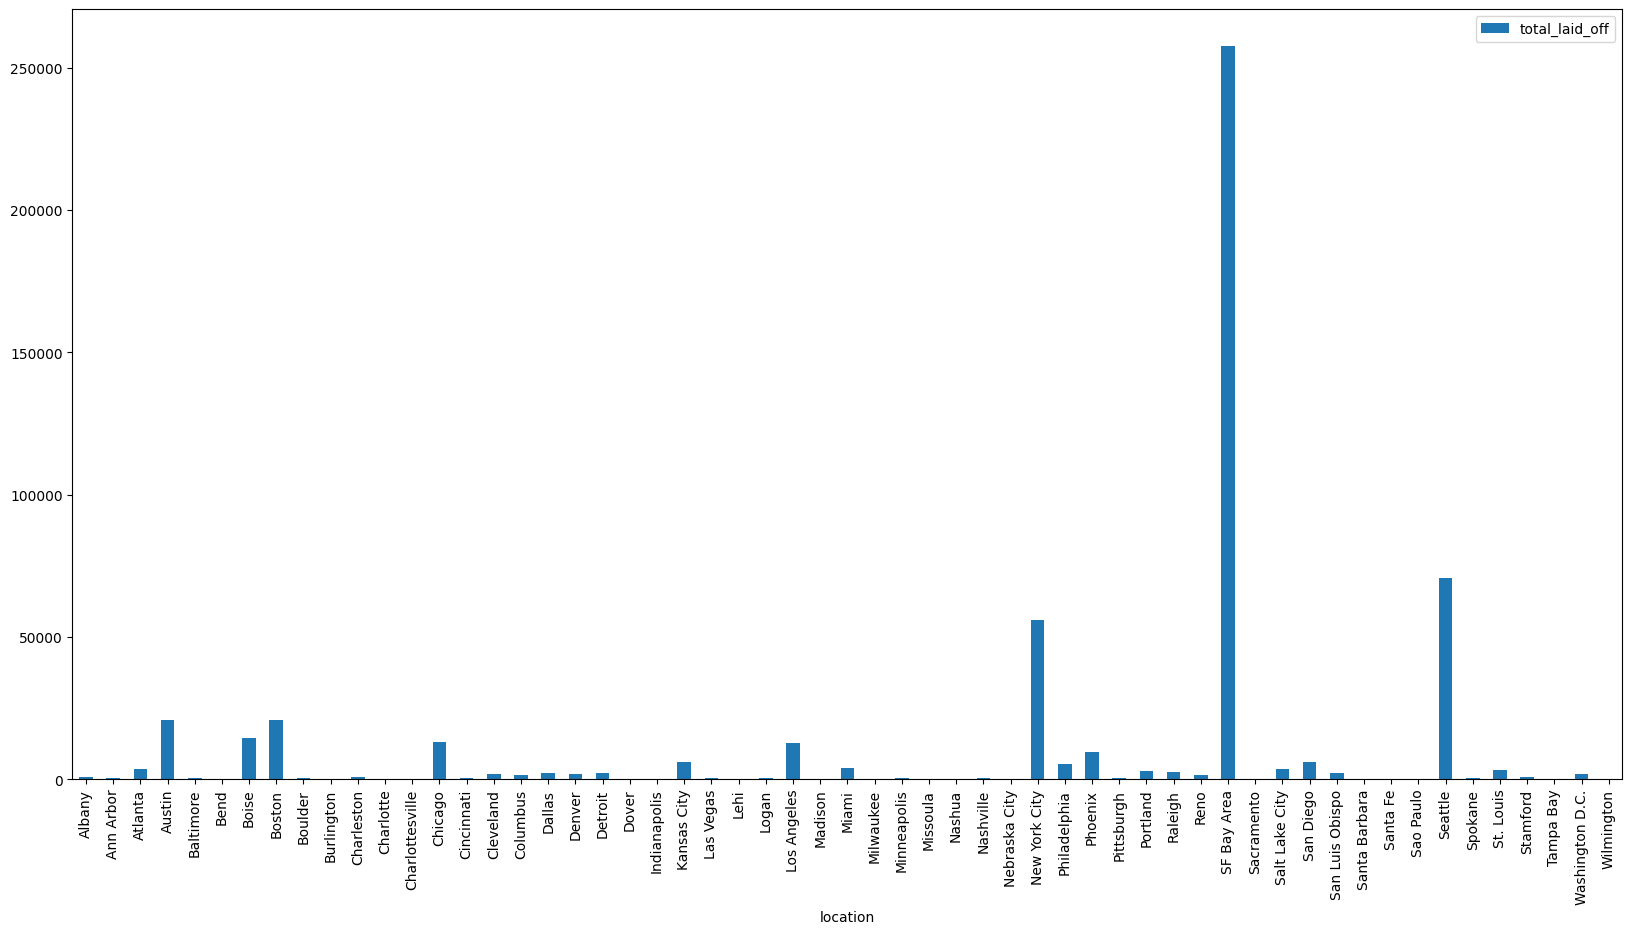

In [105]:
layoffs_in_us.plot.bar(figsize=(20,10))

### Q4: Which industry had the most layoffs over a period of four years?

In [106]:
layoffs_by_industry = data[['industry', 'total_laid_off']].groupby('industry').sum()
layoffs_by_industry

,total_laid_off
industry,
AI,20.0
Aerospace,1374.0
Construction,7406.0
Consumer,82500.0
Crypto,22836.0
Data,11606.0
Education,16563.0
Energy,614.0
Finance,56895.0


In [107]:
max_index = layoffs_by_industry['total_laid_off'].idxmax()
print(max_index)

Retail


<Axes: xlabel='industry'>

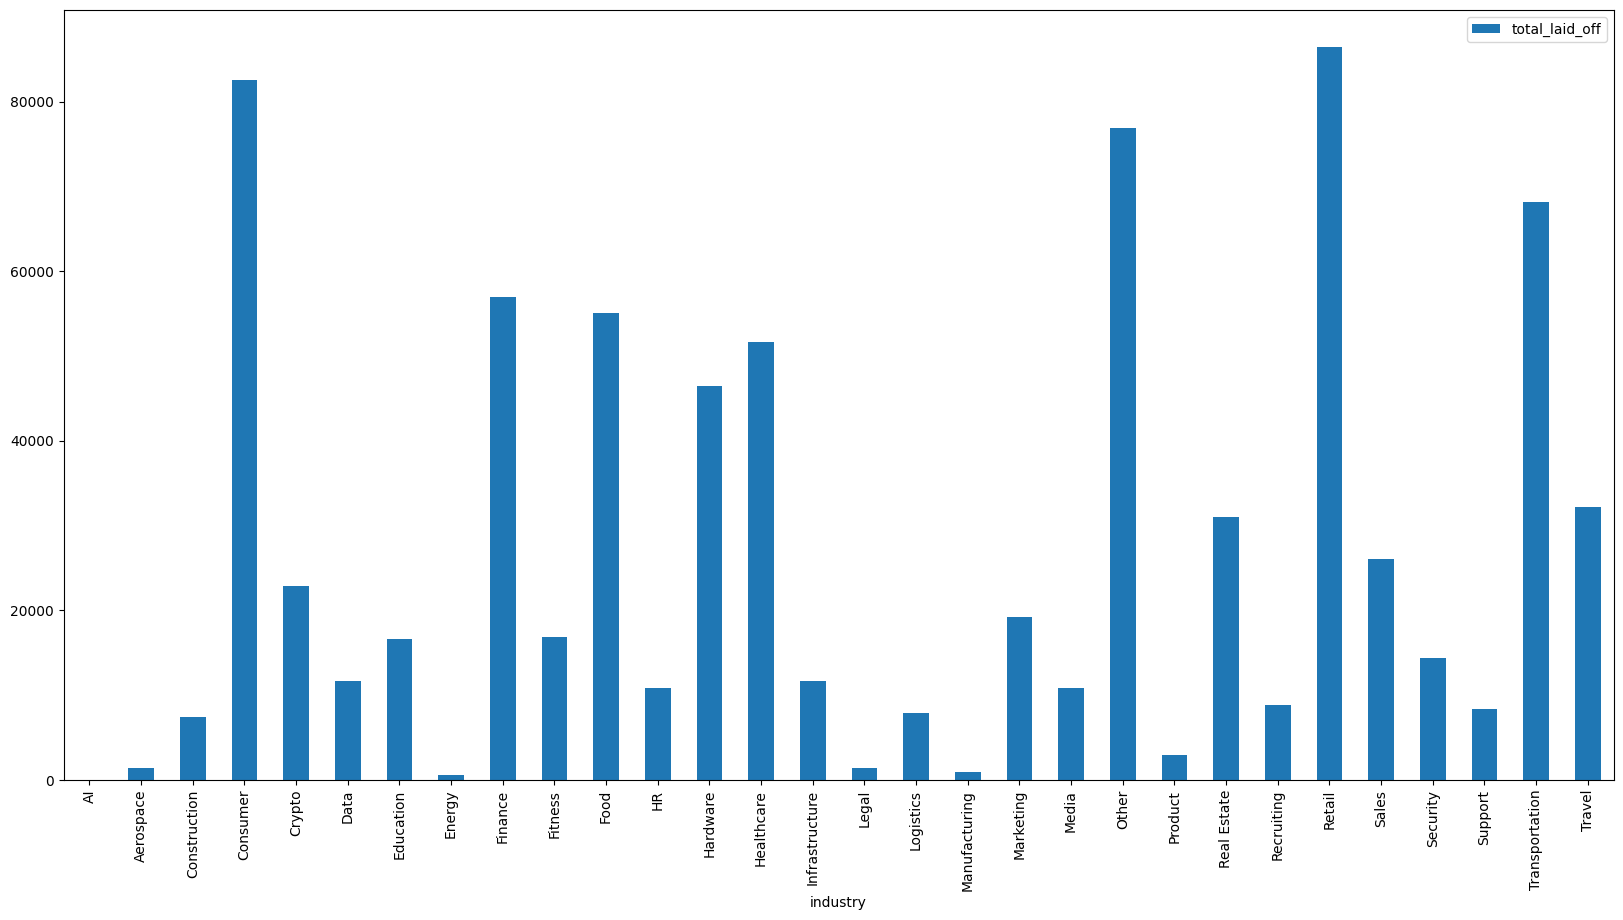

In [108]:
layoffs_by_industry.plot.bar(figsize=(20,10))

### Q5.a: Which company had the most layoffs in terms of number of people over four years?

In [109]:
layoffs_by_company = data[['company', 'total_laid_off']].groupby('company').sum()
layoffs_by_company

,total_laid_off
company,
#Paid,38.0
&Open,18.0
10X Genomics,200.0
1K Kirana,1200.0
1stdibs,140.0
...,...
iFood,710.0
iPrice Group,100.0
iRobot,450.0


In [110]:
max_index = layoffs_by_company['total_laid_off'].idxmax()
print(max_index)

Amazon


### Q5.b: Which company had the most layoffs in terms of percentage of company over four years?

In [111]:
layoffs_by_company = data[['company', 'percentage_laid_off']].groupby('company').sum()
layoffs_by_company

,percentage_laid_off
company,
#Paid,0.34
&Open,0.18
10X Genomics,0.16
1K Kirana,0.80
1stdibs,0.34
...,...
iFood,0.12
iPrice Group,0.40
iRobot,0.34


In [112]:
max_index = layoffs_by_company['percentage_laid_off'].idxmax()
print(max_index)

Pear Therapeutics


### Q6: Which stage of funding had the most layoffs?

In [113]:
layoffs_by_stage = data[['stage', 'total_laid_off']].groupby('stage').sum()
layoffs_by_stage

,total_laid_off
stage,
Acquired,60586.0
Post-IPO,448619.0
Private Equity,14214.0
Seed,2986.0
Series A,9763.0
Series B,46729.0
Series C,31607.0
Series D,36820.0
Series E,26197.0


In [114]:
max_index = layoffs_by_stage['total_laid_off'].idxmax()
print(max_index)

Post-IPO


array([<Axes: ylabel='total_laid_off'>], dtype=object)

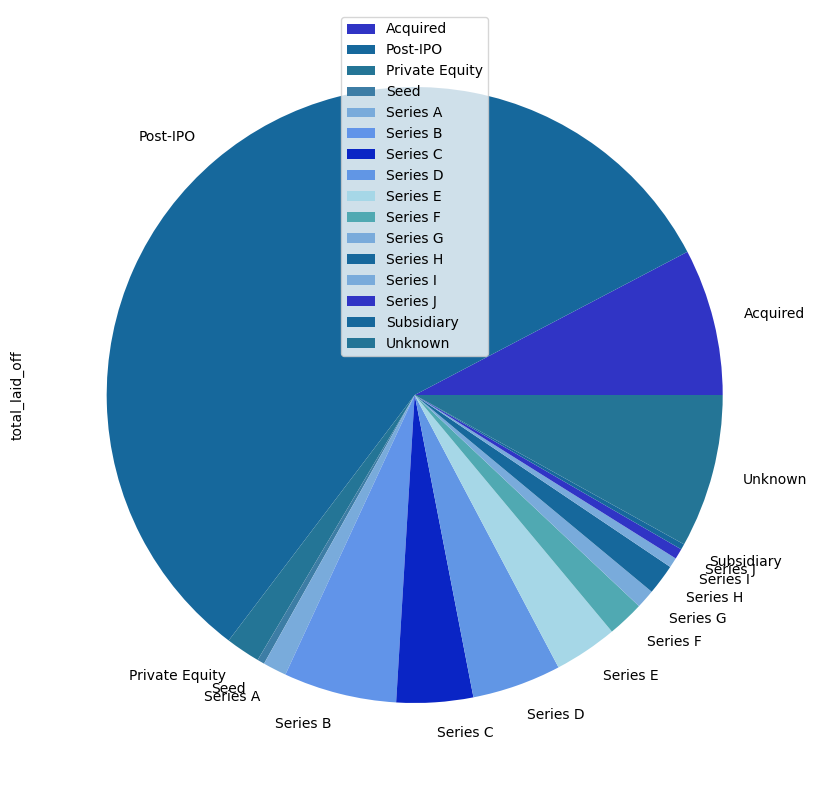

In [123]:
layoffs_by_stage.plot.pie(figsize=(10,10), subplots=True, colors=['#3034c5', '#16689c', '#247596', '#3d7da5', '#79abdb', '#6194e9', '#0a25c5', '#6196e5', '#a6d7e7', '#50a9b2', '#79abdb', '#16689c', '#79abdb'])